1. Контекст задачи

Продуктовый отдел банка решил внедрить кнопку заказ курьера (КНД) на дом для доставки банковской карты для заявок через сайт банка. Текущая конверсия составляет 30 % заявок от общего числа просматривающих страницу, ожтидаемы эффект 60%. Т.е. добавление функуиона по доставке карты на дом при заказе через сайт банка будет успещным при повышение конверсии до 60% 


2. Формулировка гипотезы

Hо: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) означают соответственно коэффициент конверсии старого и нового дизайна. Мы также установим уровень доверия 95%, то есть α = 0,05

Значение α - это порог, который устанавливаем и делаем вывод: «Если вероятность наблюдения за результатом (p-значением) ниже α, то мы отвергаем гипотезу Hо». Поскольку наша α=0,05 (что указывает на вероятность 5%), наша уверенность (1 — α) составляет 95%.

Цель тестирования: Хотим быть на 95% уверены, что внедрение КНД приводит к значительному увеличению конверсиии заказа банковских карт, прежде чем отклонить нулевую гипотезу Ho.

In [1]:
#Импортируем все библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#загружаем данный датасет 
df = pd.read_csv('ad.csv')

In [4]:
#посмотрим примерные значения и структуру данных
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


Описание набора данных:

A - контрольная группа

B - тестовая группа

action:

0 - не было оформления банковской карты

1 - было  оформление банковской карты

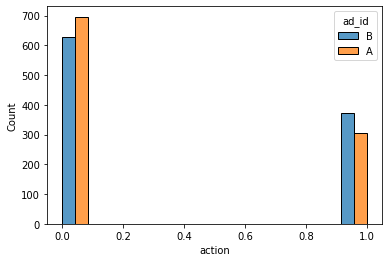

In [5]:
#строим гистрограмму входных данных, чтобы посмотреть как распределены значения
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

Формируем промежуточный вывод:

Распределение данных состоит из двух значений 0 и 1

In [14]:
#считаем сколько было оформлений банковских карт до внедрения КНД и после вредрения
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))
summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id') #по-умолчанию среднее
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0)) #вычисляем стандартное отклонение 
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0)) #вычисляем стандартное ошибку 


In [15]:
summary_df

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


Промежуточные выводы:

Кол-во заявок с КНД больше, чем без него (conversion_rate B > conversion_rate A)


Text(0, 0.5, 'Коэф-т конверсии')

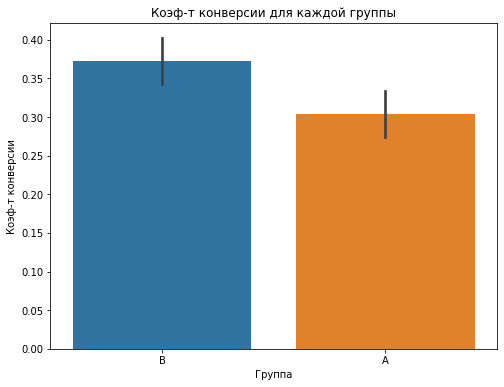

In [20]:
#визуализируем промежуточный вывод
plt.figure(figsize=(8,6))
sns.barplot(x=df['ad_id'], y=df['action'])
plt.title('Коэф-т конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

3. Проверка гипотезы

In [22]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
#Выделяем явно группы: контрольная А, тестовая В
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

In [23]:
#Считаем кол-во элементов в каждой группе
nobs = [control_results.count(), test_results.count()]

#Считаем кол-во оплат в каждой группе
successes = [control_results.sum(), test_results.sum()]

z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


Так как ни один статистический критерий не дает 100% уверенности, мы зададим ему порог 5% для ошибки первого рода — т.е. согласимся, что 5% наших наблюдений будут ошибочными.

In [24]:
alpha = 0.05 

In [25]:
print(pval < alpha)

True


Промежуточный вывод: Тк p-value < 0.05, то отклоняем нулевую гипотезу, что означает - при вреднеие КНД кол-во заявок на оформление карт значительно выше, чем без него


In [26]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


Вывод:

При внеднение КНД конверсия максимально может увеличится на 10% и составит максимум 40%. Целевое значение эффективности определенное заказчиком 60%. Соответветно. КНД эффективно, но не достигает поставленной цели по заявкам на оформление карт. Згачит КНД не будет введено в массовую эксплуатацию.
